In [1]:
!nvidia-smi

Tue Dec 12 18:08:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.06       Driver Version: 522.06       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P0    10W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os

HOME = os.getcwd()
print(HOME)

c:\Users\fiira\yolo


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.5 torch-2.1.1+cpu CPU (12th Gen Intel Core(TM) i5-12450H)
Setup complete  (12 CPUs, 15.6 GB RAM, 254.4/475.6 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
#!mkdir {HOME}/dataset
#%cd {HOME}/dataset

# Replace 'C:\\Users\\fiira' with the actual path to your home directory
HOME = 'C:\\Users\\fiira'

# Create a directory named "dataset" within the home directory
dataset_path = os.path.join(HOME, 'dataset')
os.makedirs(dataset_path, exist_ok=True)

# Change the working directory to the newly created "dataset" directory
os.chdir(dataset_path)

# Print the current working directory to verify the change
print(os.getcwd())

# Assuming your local dataset is in the following path, modify it accordingly
# local_dataset_path = ""
# print(local_dataset_path)

C:\Users\fiira\dataset


In [7]:
#aku pakai pip roboflow ni sebab nak import preprocessed dataset dari roboflow

!pip install roboflow

In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key="UC3C3O3w8KxfoHRMjKCP")
project = rf.workspace("fyp-jigzw").project("object-detection-furniture")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-Detection-(Furniture)-1 in yolov8:: 100%|██████████| 12028/12028 [00:08<00:00, 1386.27it/s]


In [9]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [10]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=500

C:\Users\fiira


New https://pypi.org/project/ultralytics/8.0.227 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.11.5 torch-2.1.1+cpu CPU (12th Gen Intel Core(TM) i5-12450H)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:\Users\fiira\dataset\Object-Detection-(Furniture)-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=500, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_wi

In [11]:
# !ls {HOME}/runs/segment/train/
directory_path = os.path.join(HOME, "runs", "detect", "train")
!dir $directory_path

 Volume in drive C is OS
 Volume Serial Number is DECA-F208

 Directory of C:\Users\fiira\runs\detect\train

12/12/2023  01:08 PM    <DIR>          .
12/12/2023  06:09 PM    <DIR>          ..
12/12/2023  12:30 PM             1,540 args.yaml
12/12/2023  05:49 PM           604,178 events.out.tfevents.1702355442.Firas.17584.0
12/12/2023  12:30 PM           214,912 labels.jpg
12/12/2023  12:30 PM           183,586 labels_correlogram.jpg
12/12/2023  05:48 PM             2,696 results.csv
12/12/2023  12:31 PM           481,582 train_batch0.jpg
12/12/2023  12:31 PM           445,658 train_batch1.jpg
12/12/2023  12:31 PM           488,197 train_batch2.jpg
12/12/2023  01:08 PM    <DIR>          weights
               8 File(s)      2,422,349 bytes
               3 Dir(s)  231,495,741,440 bytes free


C:\Users\fiira


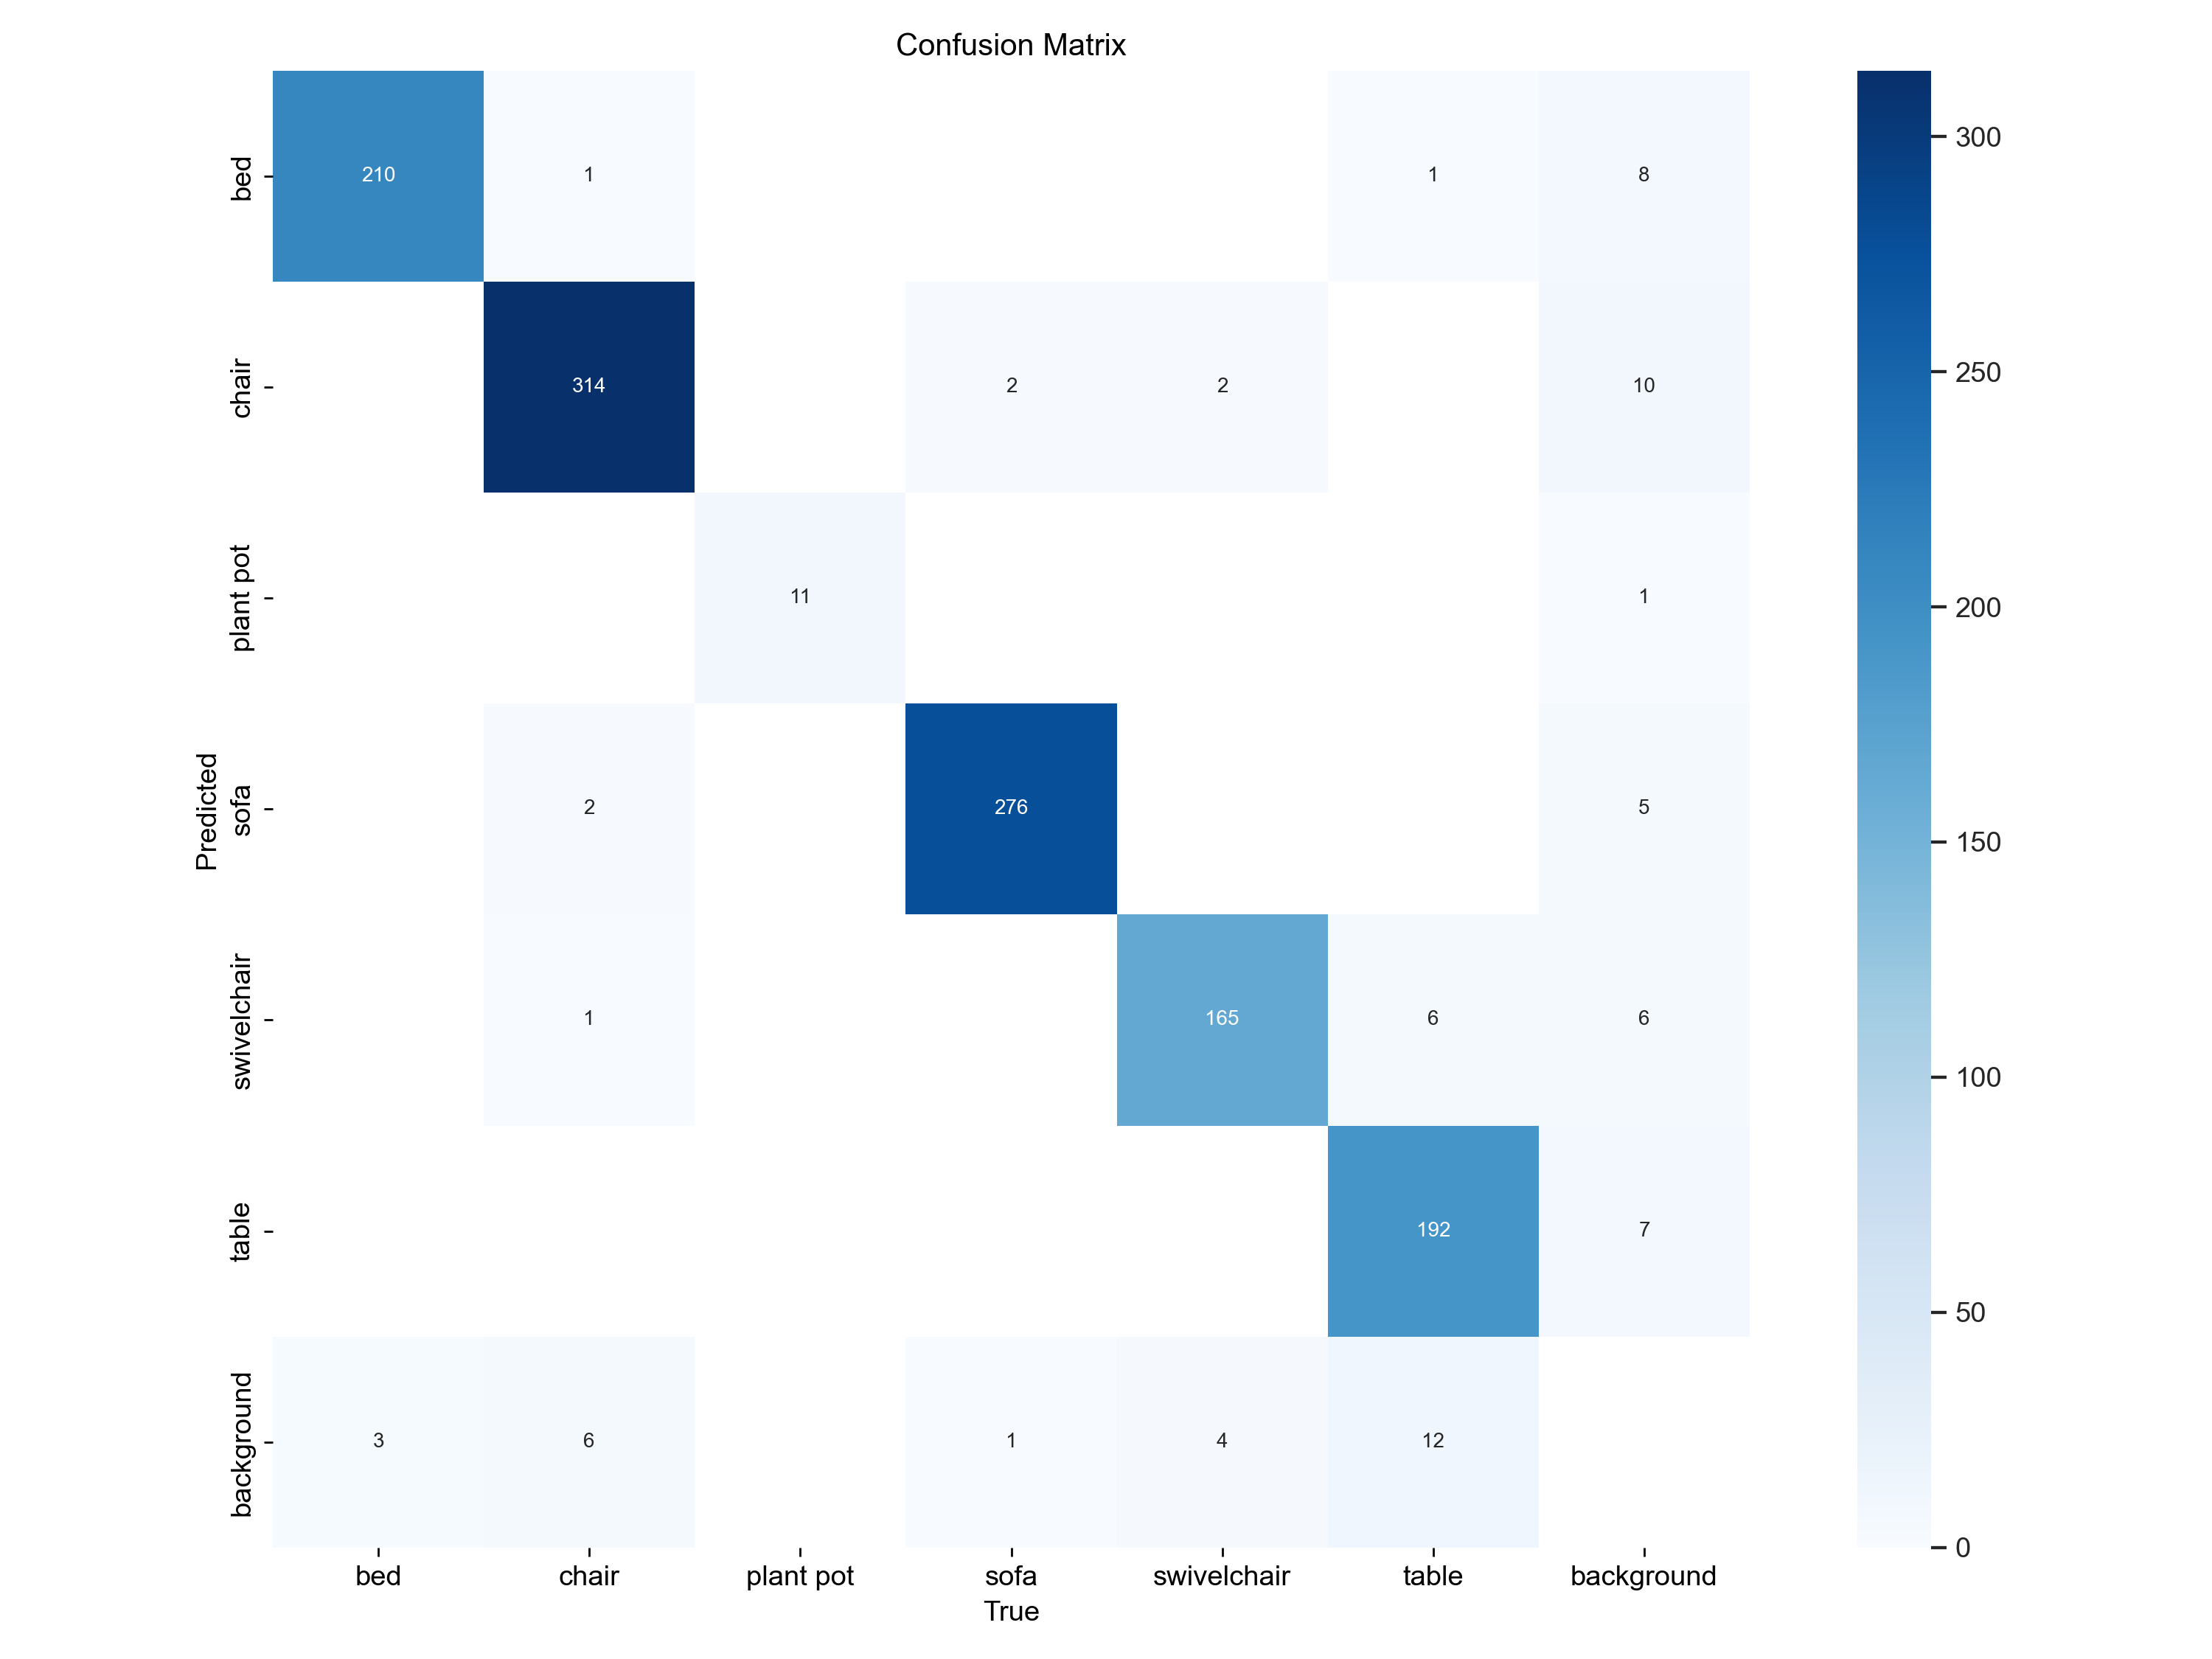

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/confusion_matrix.png', width=700)

C:\Users\fiira


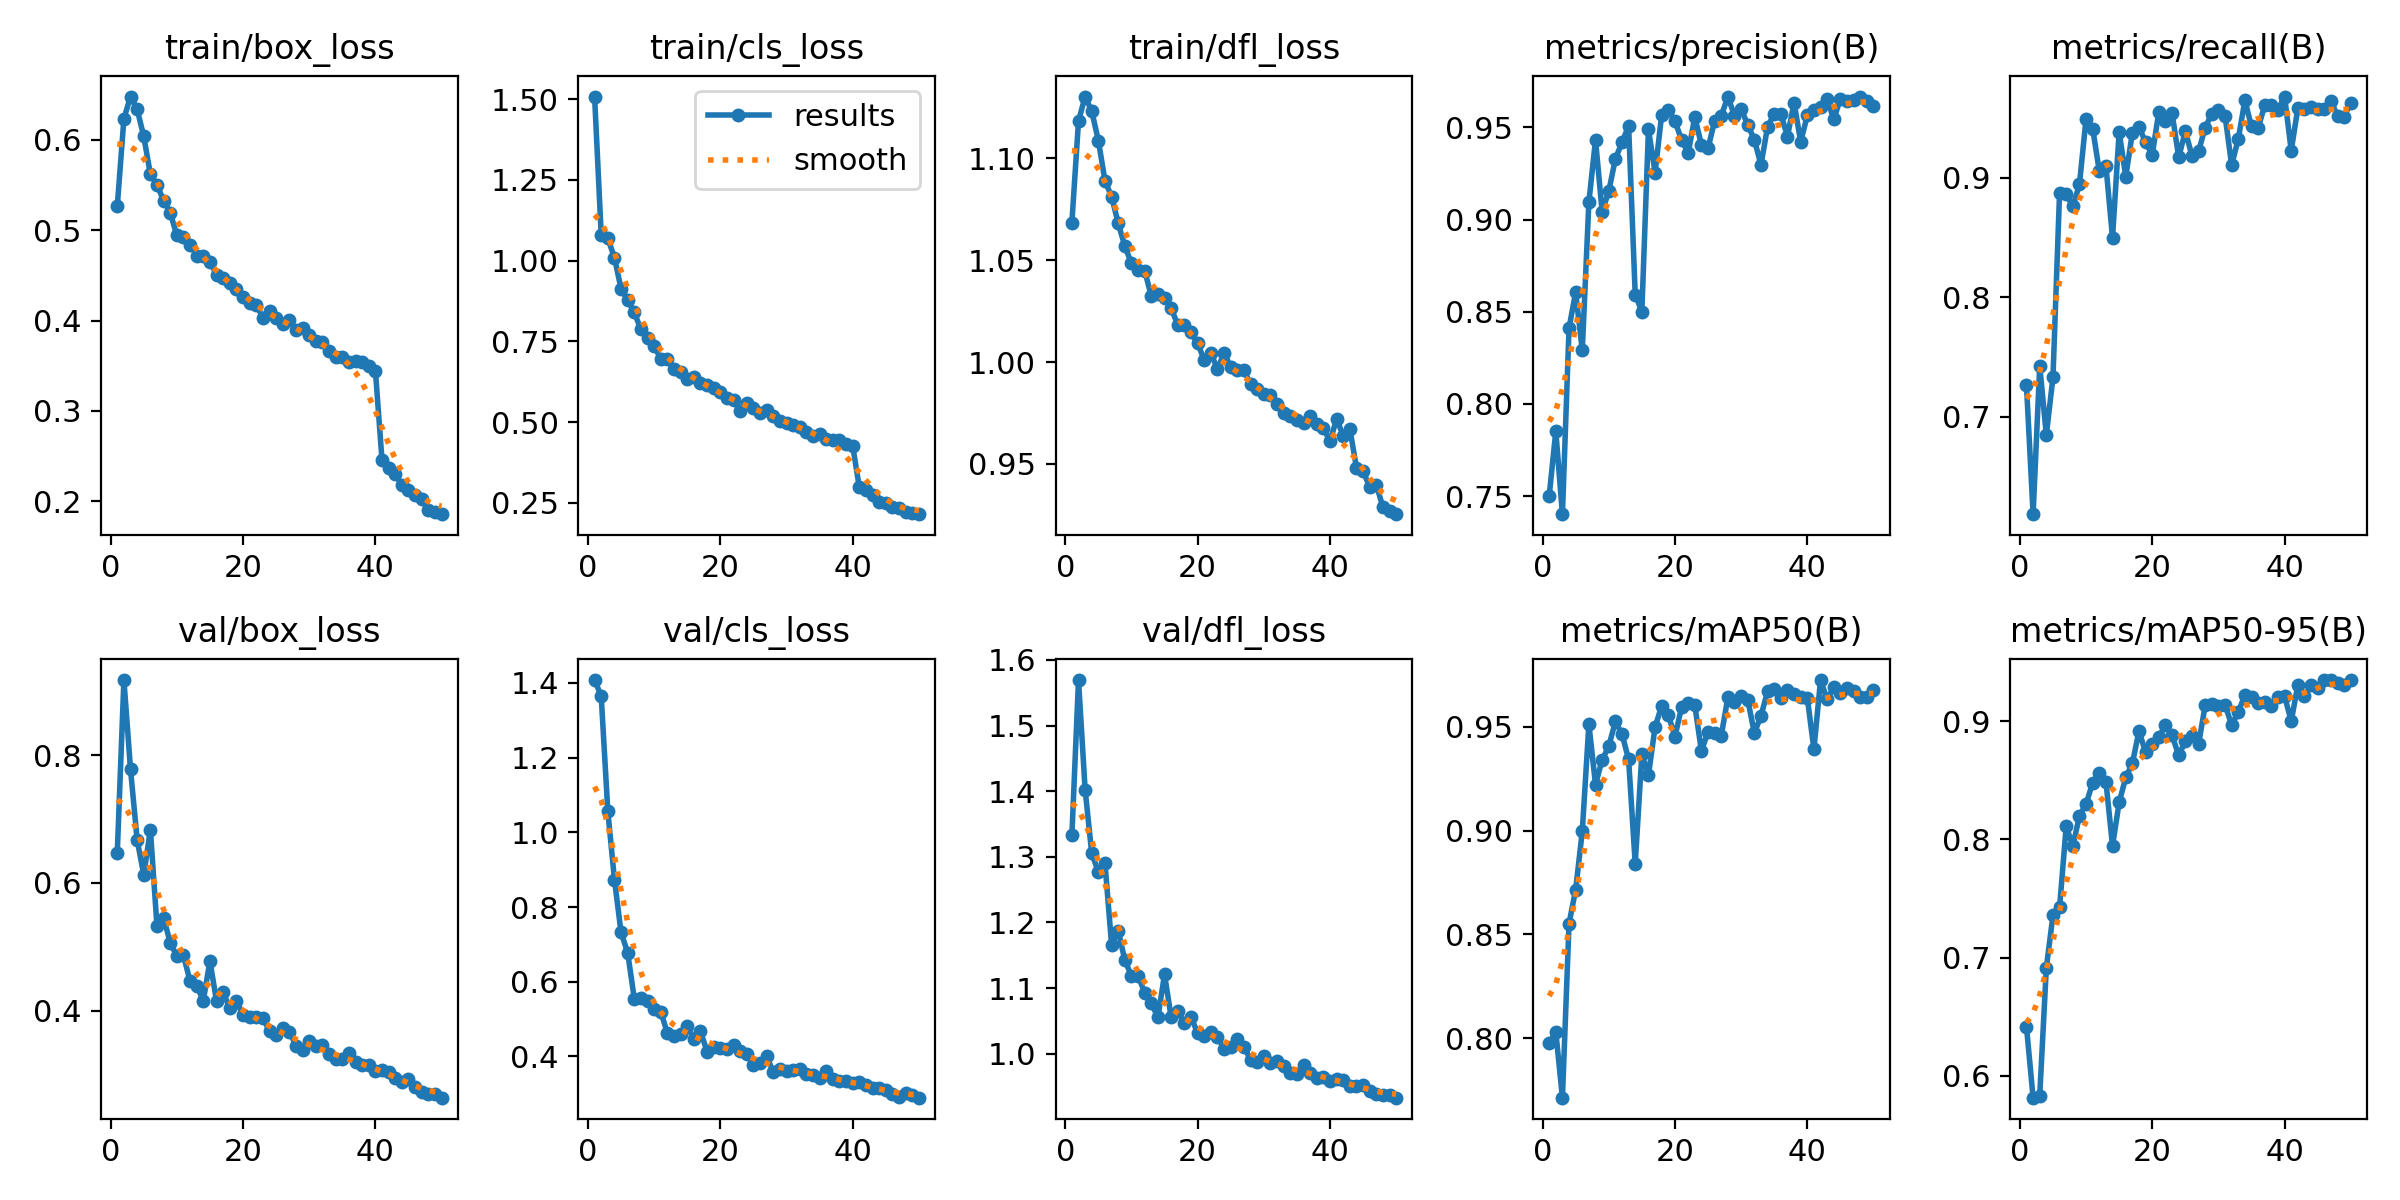

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/results.png', width=1000)

C:\Users\fiira


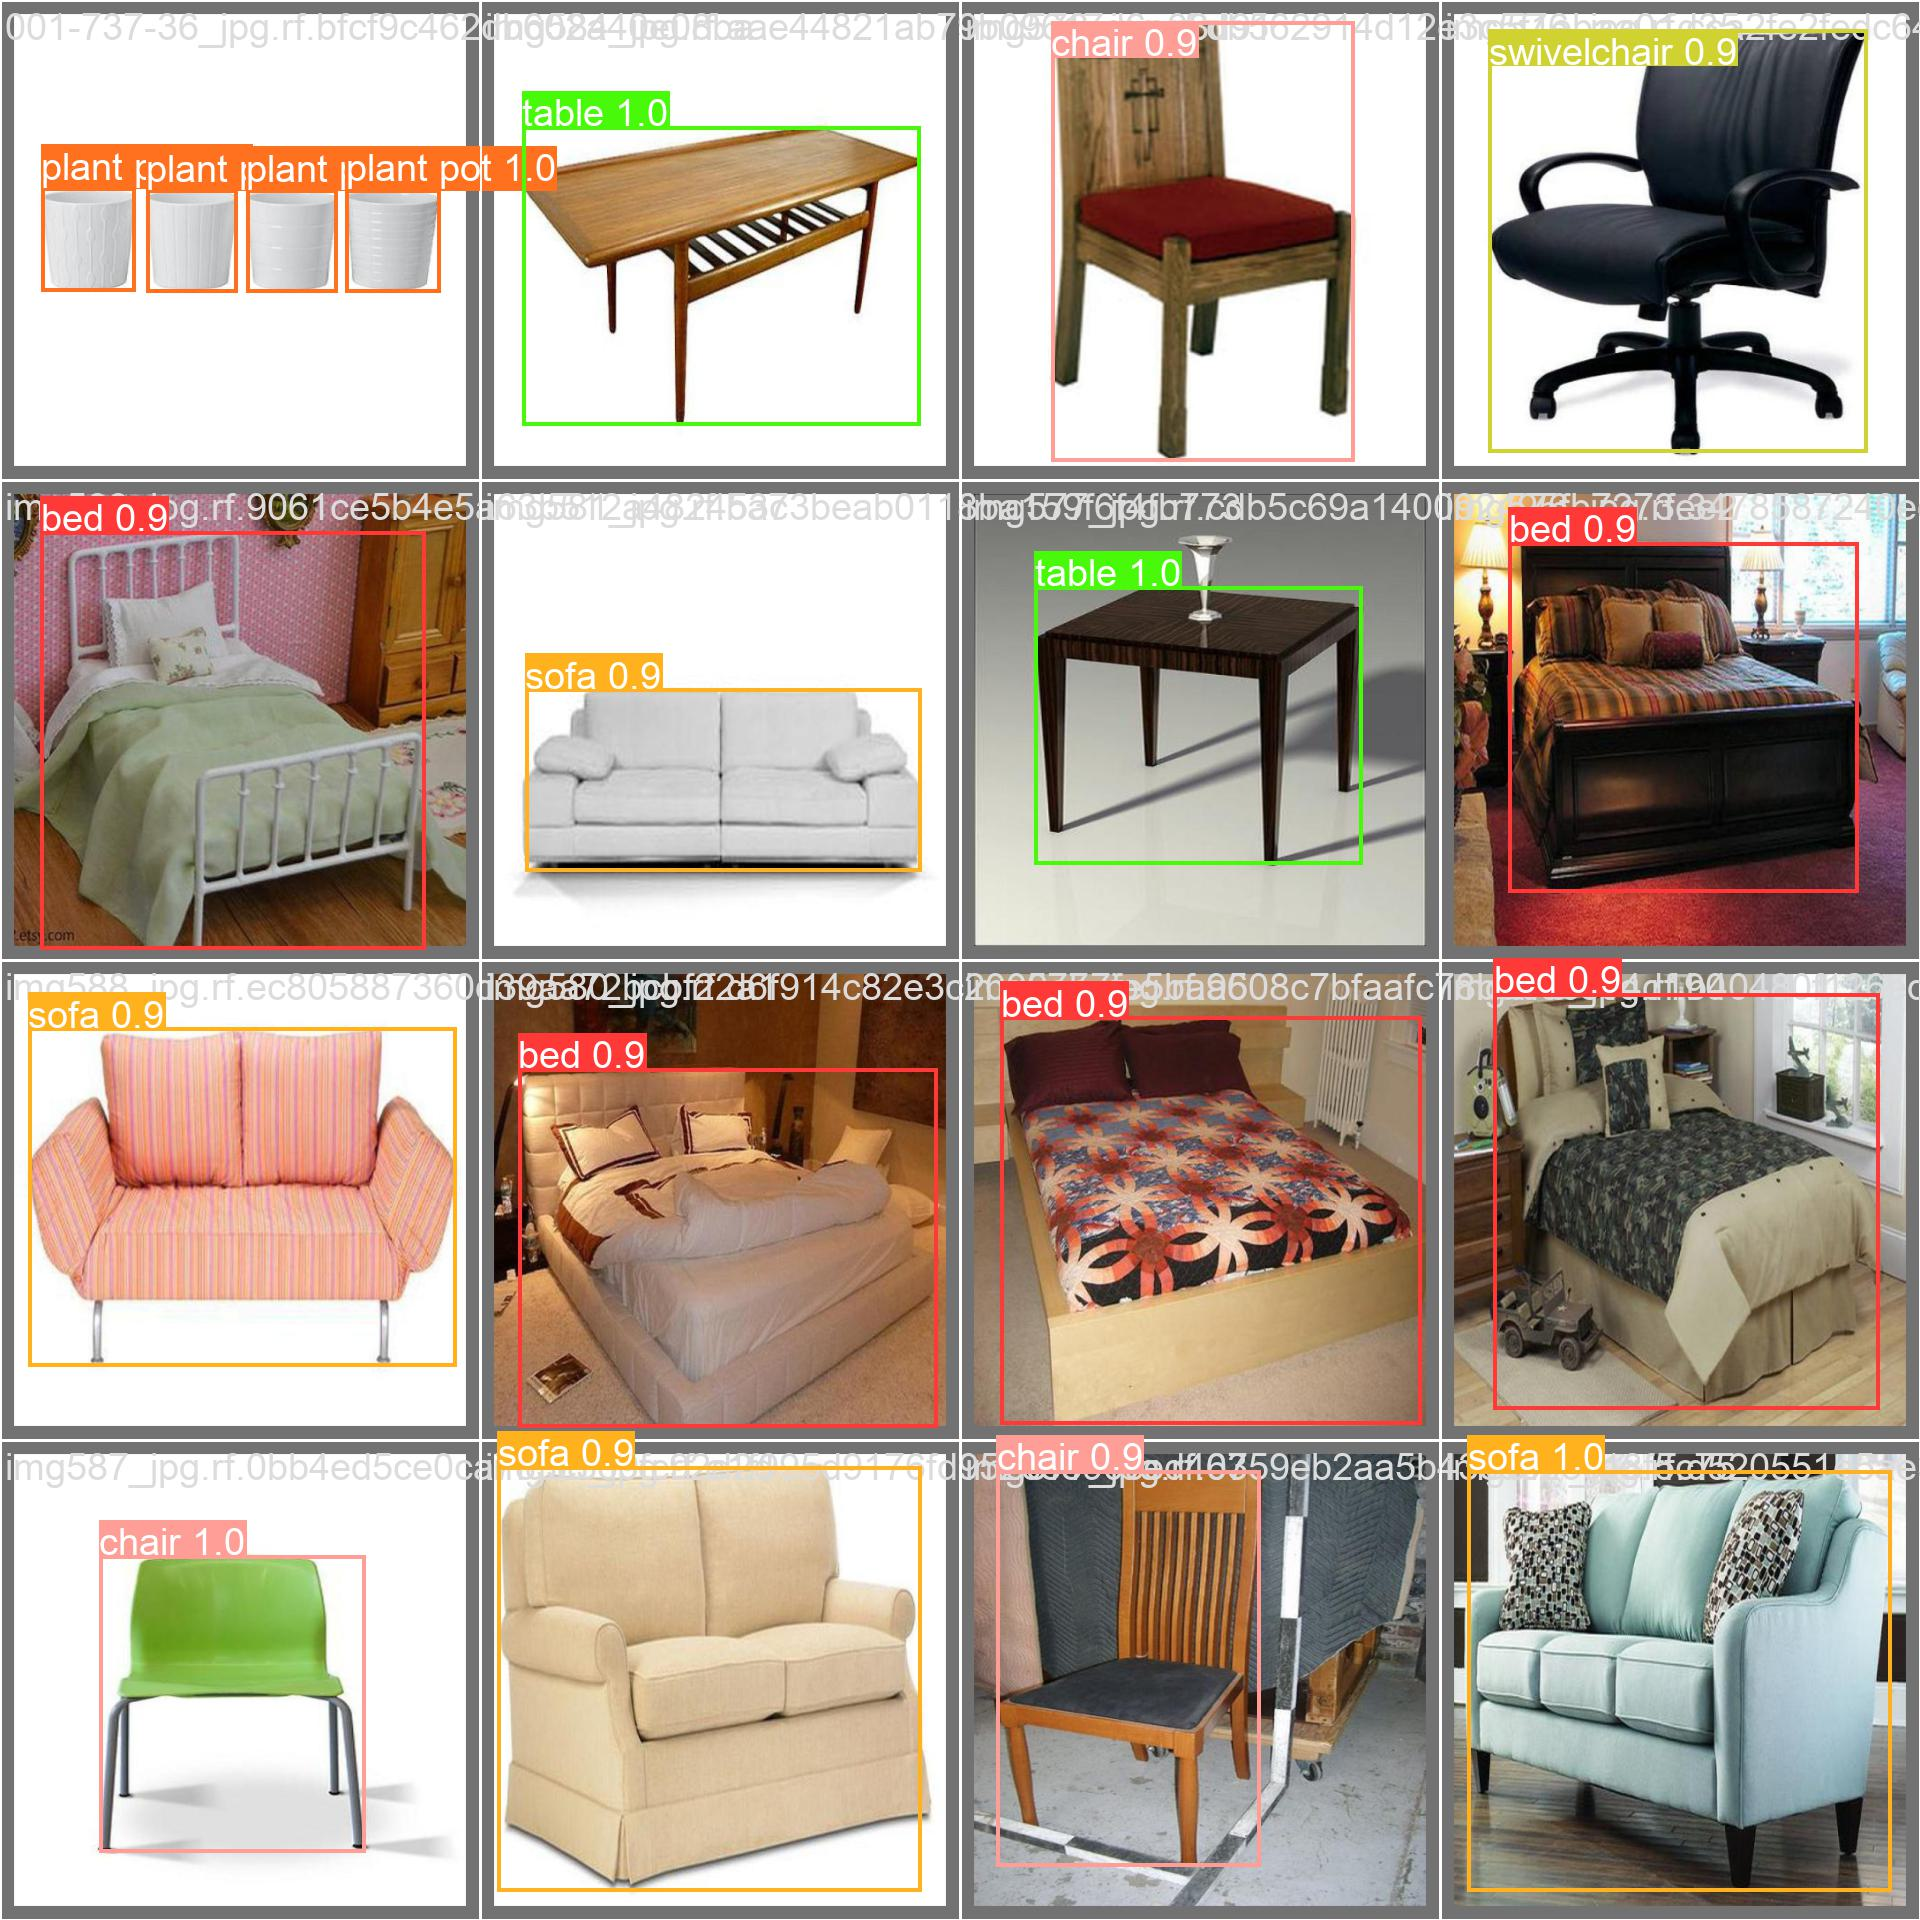

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/val_batch0_pred.jpg', width=500)

In [16]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train7/weights/best.pt data={dataset.location}/data.yaml

C:\Users\fiira
Ultralytics YOLOv8.0.227 🚀 Python-3.11.5 torch-2.1.1+cpu CPU (12th Gen Intel Core(TM) i5-12450H)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
                   all       1201       1209      0.962      0.963      0.968      0.935
                   bed       1201        213      0.954      0.969      0.967      0.913
                 chair       1201        324      0.972      0.952       0.98      0.954
             plant pot       1201         11      0.974          1      0.995      0.976
                  sofa       1201        279      0.975      0.987      0.985      0.945
           swivelchair       1201        171      0.921      0.965      0.941      0.908
                 table       1201        211      0.974      0.904      0.939      0.913
Speed: 2.1ms preprocess, 331.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\val
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\fiira\dataset\Object-Detection-(Furniture)-1\valid\labels.cache... 1201 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1201/1201 [00:00<?, ?it/s]
val: Scanning C:\Users\fiira\dataset\Object-Detection-(Furniture)-1\valid\labels.cache... 1201 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1201/1201 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/76 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|▏         | 1/76 [00:02<02:52,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 2/76 [00:04<02:40,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   4%|▍         | 3/76 [00:06<02:32,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 4/7

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train7/weights/best.pt conf=0.7 source={dataset.location}/test/images save=true

C:\Users\fiira
Ultralytics YOLOv8.0.227 🚀 Python-3.11.5 torch-2.1.1+cpu CPU (12th Gen Intel Core(TM) i5-12450H)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/601 C:\Users\fiira\dataset\Object-Detection-(Furniture)-1\test\images\101-556-71_jpg.rf.ec716a7cfbd041d2922a35f25ea61372.jpg: 512x512 1 plant pot, 131.2ms
image 2/601 C:\Users\fiira\dataset\Object-Detection-(Furniture)-1\test\images\302-580-36_jpg.rf.53290e66fd3ac635c022d3d7871f5d98.jpg: 512x512 1 plant pot, 98.3ms
image 3/601 C:\Users\fiira\dataset\Object-Detection-(Furniture)-1\test\images\703-264-20_jpg.rf.fd7a269fc7c6a71306c98c12bb513f66.jpg: 512x512 (no detections), 93.7ms
image 4/601 C:\Users\fiira\dataset\Object-Detection-(Furniture)-1\test\images\img0_jpg.rf.b349e66c69fc9f327851c74ba76eecfa.jpg: 512x512 1 bed, 94.3ms
image 5/601 C:\Users\fiira\dataset\Object-Detection-(Furniture)-1\test\images\img1009_jpg.rf.60a0ae5b01040d884418780e5c35e609.jpg: 512x512 1 sofa, 93.4ms
image 6/601

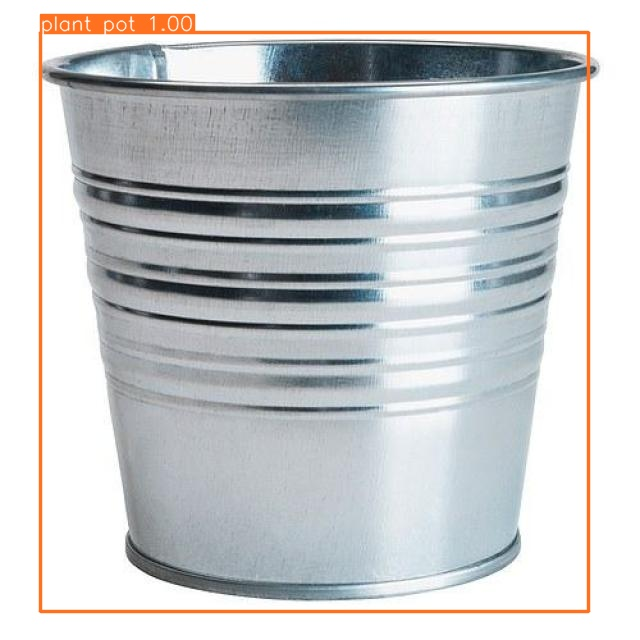

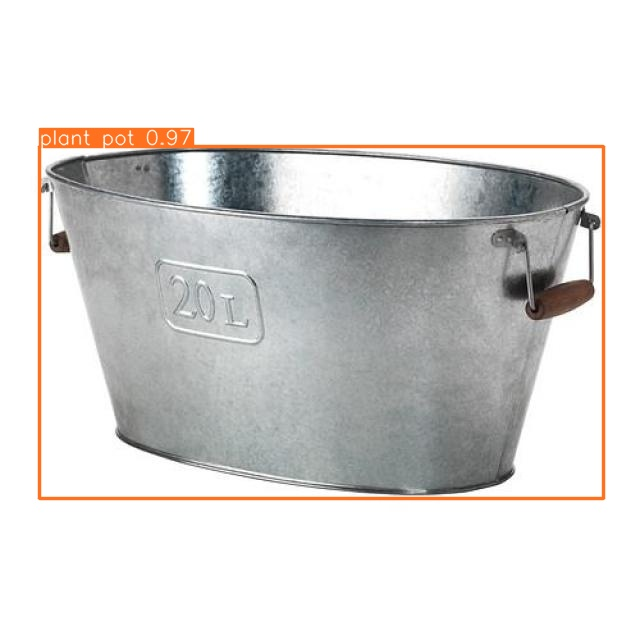

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:2]:
      display(Image(filename=image_path, height=500))
      print("\n")